In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('RawHousing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Note: we have 6 numerical and 7 categorical features

Step 1: Basic info
1) data types?
2) range of values? mean, max, count ...
3) columns name
4) Null values?
5) Duplicate values

In [129]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [130]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Step 2: Change categorical features to numerical

In [131]:
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
cat_to_num = {'yes': 1, 'no':0}
cat_to_furnished = {'furnished': 1, 'unfurnished':0, 'semi-furnished':2}
#Loop through all categorical features with the condition of furnishingstatus because this fetures has three categoreis
for i in cat_features:
    if i == 'furnishingstatus':
        df[i] = df[i].map(cat_to_furnished)
    else:
        df[i] = df[i].map(cat_to_num)

In [132]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [133]:
gb_price_area = df.groupby('price')['area'].max()
gb_price_area = gb_price_area.reset_index()
gb_price_area = gb_price_area.sort_values(by='price')

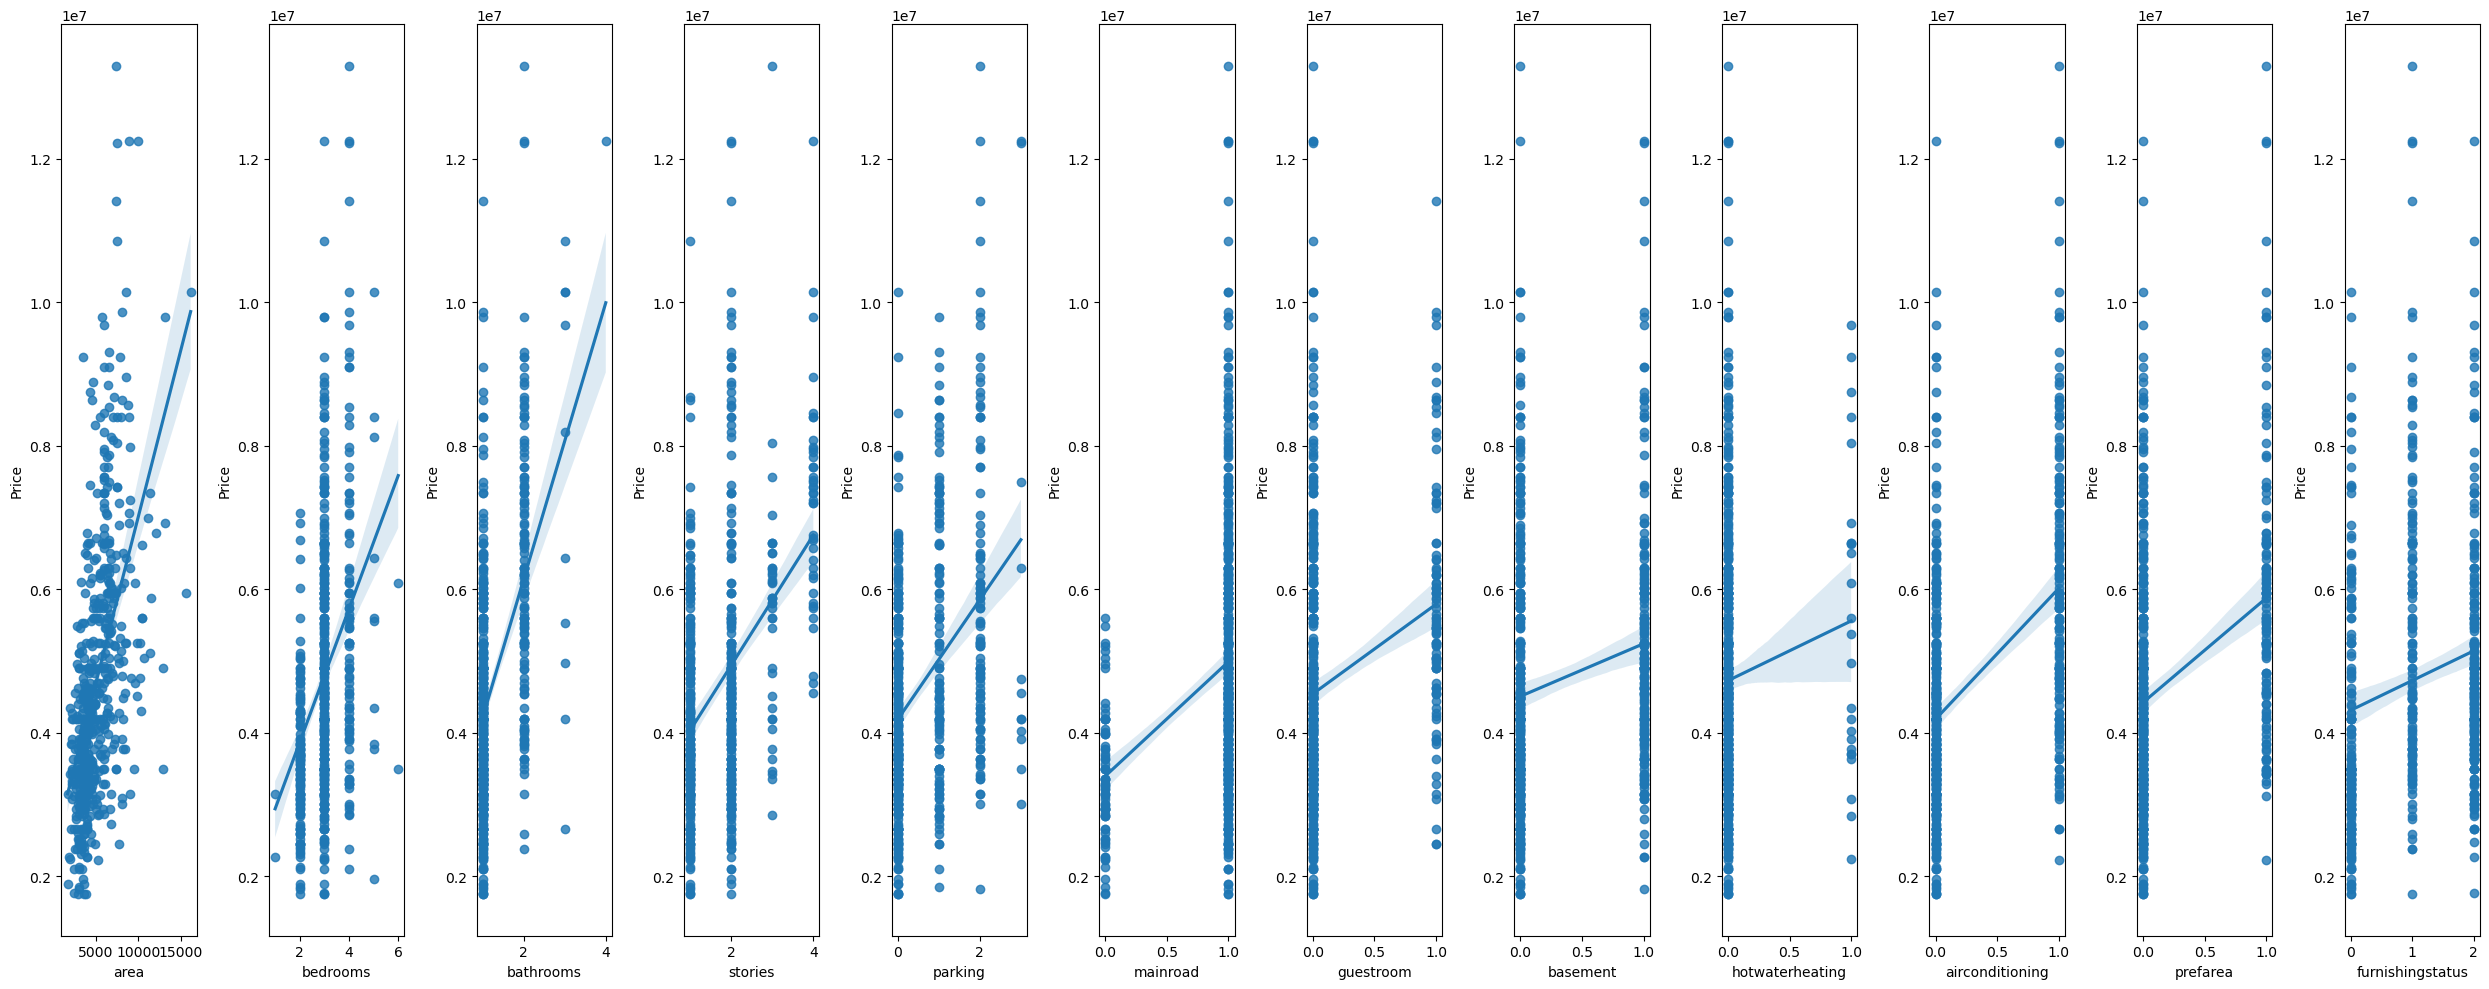

In [161]:
features_df = ['area', 'bedrooms', 'bathrooms', 'stories', 
               'parking','mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'prefarea', 
               'furnishingstatus']

# Create subplots using a loop
fig, axes = plt.subplots(ncols=len(features_df) , figsize=(25, 10))

# Loop through each feature and create a regression plot
for i, feature in enumerate(features_df):
    sns.regplot(x=df[feature], y=df['price'], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

These plots are showing a clear relation between price and 12 other features. The highest relation is for area, bedrooms, bathrooms, parking and stories and the lowest relation belongs to guestroom, basement,hotwatering and furnishing status. Therefore, removing these features with low relation with price can increase the model accuracy and gradient decent speed.

In [163]:
df = df.drop(columns=['guestroom', 'basement', 'hotwaterheating', 'furnishingstatus'])

In [164]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,1,2,1
1,12250000,8960,4,4,4,1,1,3,0
2,12250000,9960,3,2,2,1,0,2,1
3,12215000,7500,4,2,2,1,1,3,1
4,11410000,7420,4,1,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,2,0
541,1767150,2400,3,1,1,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0
543,1750000,2910,3,1,1,0,0,0,0


In [168]:
df.to_csv('cleanHousing.csv', index=False)